# <center>Applied Machine Learning </center>
## <center>DMS673</center>                                        
### <center>Assignment 3 </center>
                                     
### Submitted By: 

Harsh   **(231010011)**

Rohit       **(231140019)**

Divyesh Parmar         **(231140008)**

# use VS code or Console to deploy the file
## Write streamlit run app.py

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("IRIS.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# EDA

# Univariate Analysis

<Axes: xlabel='petal_length', ylabel='Count'>

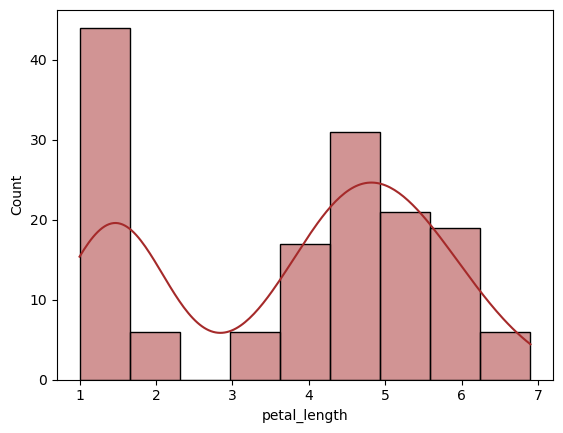

In [9]:
sns.histplot(data=df, x="petal_length", kde=True, color = "brown")

<Axes: xlabel='petal_width', ylabel='Count'>

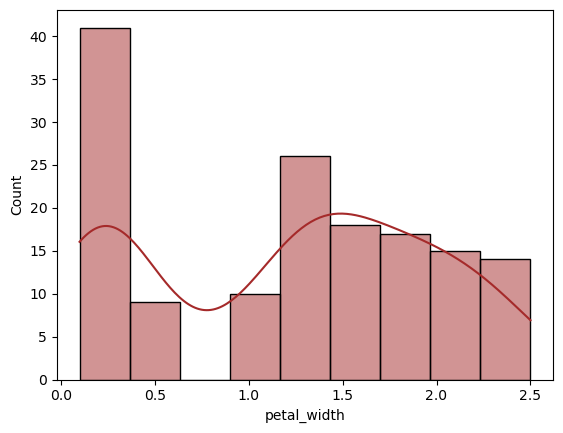

In [10]:
sns.histplot(data=df, x="petal_width", kde=True, color = "brown")

<Axes: xlabel='sepal_length', ylabel='Count'>

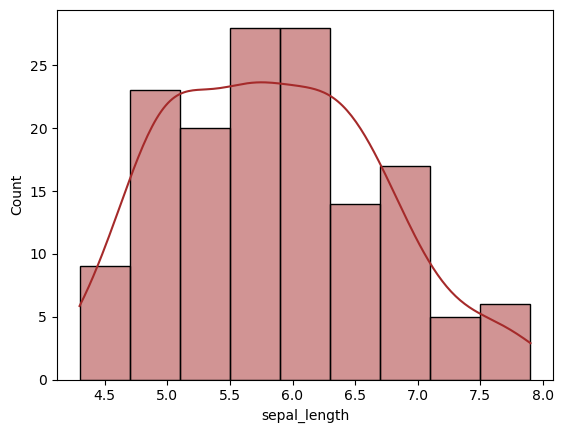

In [11]:
sns.histplot(data=df, x="sepal_length", kde=True, color = "brown")

<Axes: xlabel='sepal_width', ylabel='Count'>

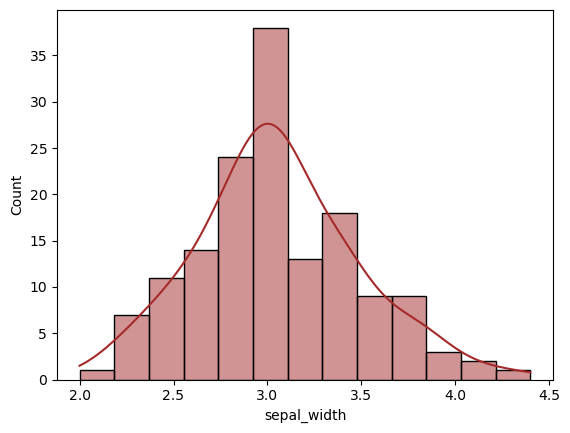

In [12]:
sns.histplot(data=df, x="sepal_width", kde=True, color = "brown")

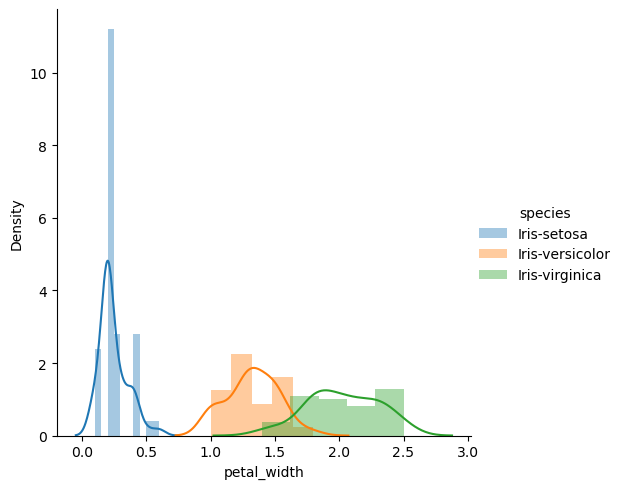

In [13]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_width").add_legend()
plt.show()

if petal_width of flower is less than 0.8 then it is setosa but here also some of portion of verginica and versicolor is overlapped so it may be difficult to categoried these two feature based on petal_width


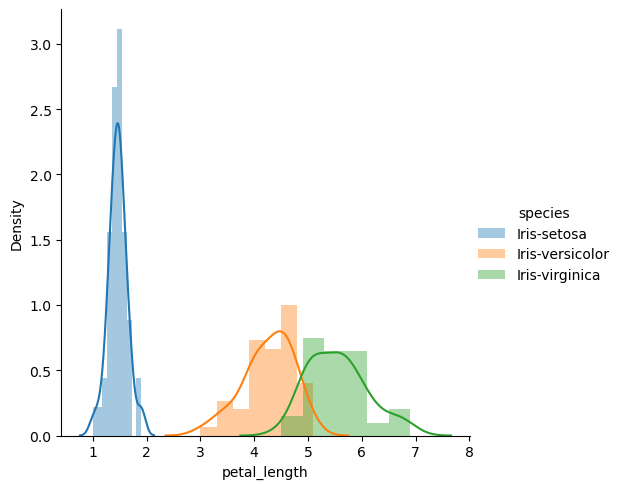

In [14]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_length").add_legend()
plt.show()

Observation:- if petal_length of flower less than 2 it is setosa  type and if petal_length of flower lies between 2 to 5 then it may be categories in versicolor else verginica here categorisation based on petal length clearly identified setosa but some portion of versicolor and verginica is overlapped so it may be difficult to categories these two flower types  based upon the petal_length

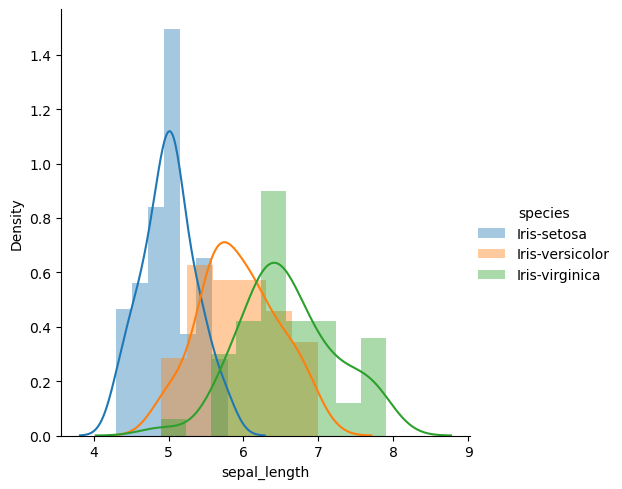

In [15]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_length").add_legend()
plt.show()

here from above diagram it is more difficult to categorised based on sepal length because here all three types of flower overlapped to each other in some portion .

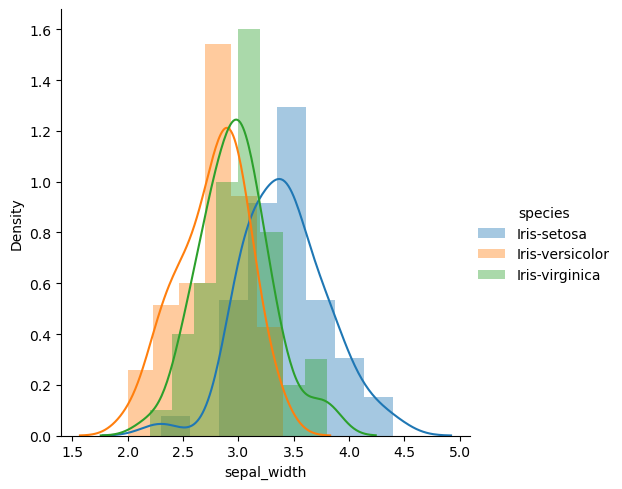

In [16]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_width").add_legend()
plt.show()

it is most difficult to categories flower type based on sepal_width because in above diagram most of part of all three flower types is overlapped to each other

# Bivariate Analysis

<Axes: xlabel='petal_length', ylabel='petal_width'>

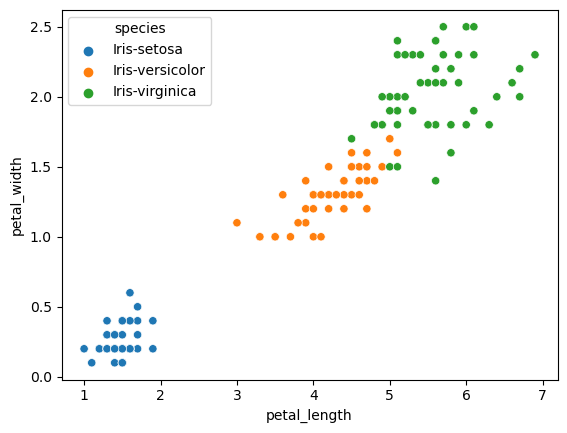

In [17]:
 
sns.scatterplot(data=df, x='petal_length', 
                y='petal_width', hue='species') 



From the above diagram we can clearly sea that setosa can be easily identified (linearly seperable),verginica and versicolor have some overlap(almost linearly seperable)

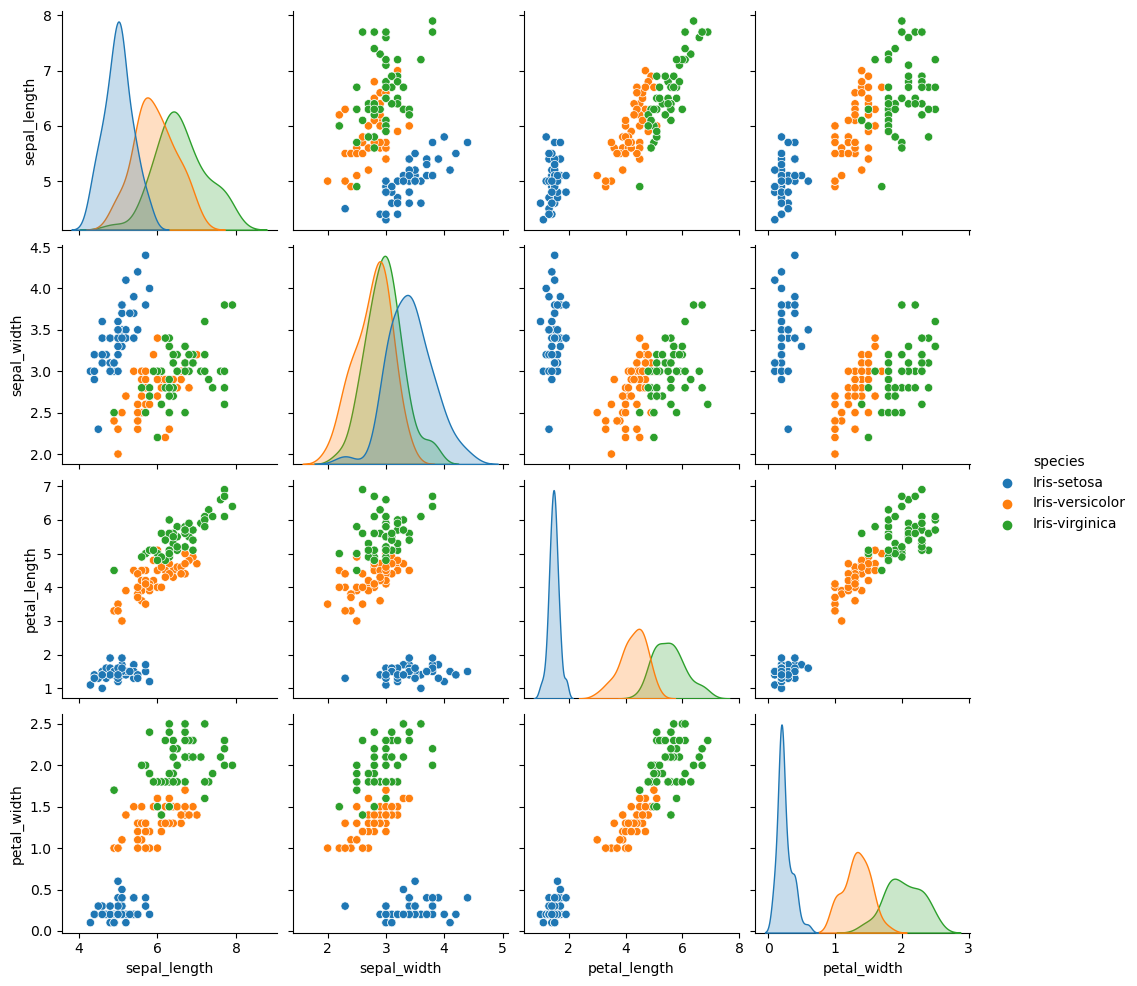

In [18]:

sns.pairplot(df, hue='species')


*Observation*:-

1.Petal_length and Petal_width are the most important features to identify various flower types

2.we can find "lines" and "if-else" conditions to build a simple model to classify the flower types

In [19]:

print(df['species'].value_counts())


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


<Axes: xlabel='species', ylabel='count'>

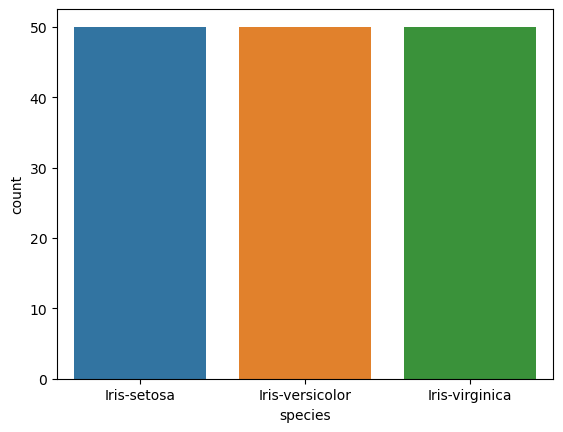

In [20]:

sns.countplot(x='species', data=df)


### Correlation

In [21]:

correlation_matrix = df.corr()
print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


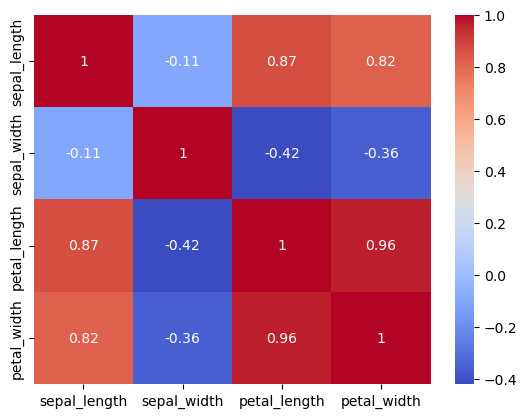

In [22]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Very high correlations can be observed between the features

### BoxPlot

<Axes: xlabel='petal_length', ylabel='species'>

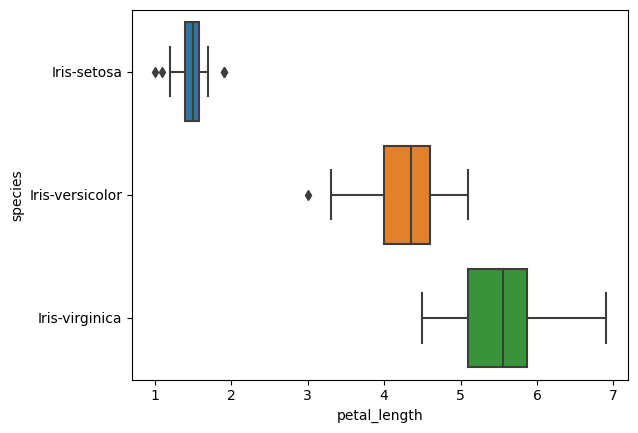

In [23]:
sns.boxplot(data=df, x="petal_length", y="species")

<Axes: xlabel='petal_width', ylabel='species'>

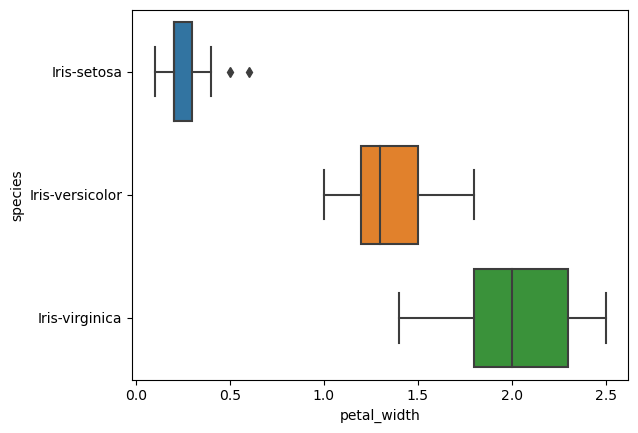

In [24]:
sns.boxplot(data=df, x="petal_width", y="species")

<Axes: xlabel='sepal_length', ylabel='species'>

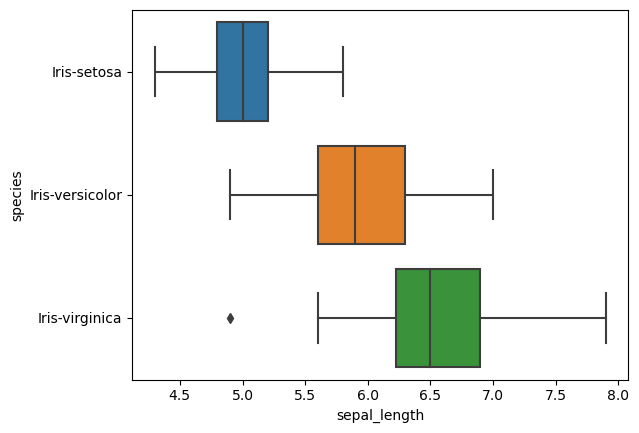

In [25]:
sns.boxplot(data=df, x="sepal_length", y="species")

<Axes: xlabel='sepal_width', ylabel='species'>

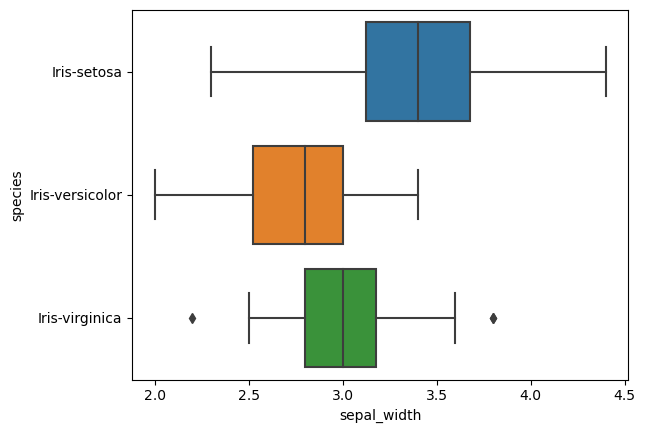

In [26]:
sns.boxplot(data=df, x="sepal_width", y="species")

#### We can see that all the iris types are very well separable for all the given features except sepal_width this show that any error or un-deterministic part of the model arises from the sepal_width features

In [27]:
import tensorflow as tf

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
X = df.drop('species', axis=1)
y = df['species']

In [30]:
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_trainList = y_train.tolist()

In [33]:
y_check = pd.DataFrame(y_trainList)

In [34]:
y_check.value_counts()

0    1    2  
0.0  1.0  0.0    41
1.0  0.0  0.0    40
0.0  0.0  1.0    39
dtype: int64

In [35]:
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(3, activation='softmax')
])

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1, validation_split=0.2)


Epoch 1/100




20/20 [==============================] - 4s 36ms/step - loss: 1.2740 - accuracy: 0.3333 - val_loss: 1.1465 - val_accuracy: 0.2083
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0969 - accuracy: 0.5104 - val_loss: 0.9973 - val_accuracy: 0.5833
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0105 - accuracy: 0.5729 - val_loss: 0.9413 - val_accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9593 - accuracy: 0.5625 - val_loss: 0.9166 - val_accuracy: 0.6250
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9098 - accuracy: 0.6042 - val_loss: 0.8893 - val_accuracy: 0.5833
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8648 - accuracy: 0.5938 - val_loss: 0.8681 - val_accuracy: 0.4167
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8199 - accuracy: 0.5938 - val_loss: 0.8387 - val_accuracy: 0.4167
Epoch 8/100
20/20 [===

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


1/1 [==============================] - 0s 69ms/step - loss: 0.1431 - accuracy: 0.9667
Test Accuracy: 0.97


Since the flower types are very well separated on all features hence we get such an accurate model which can correctly predict all instances of the dataset

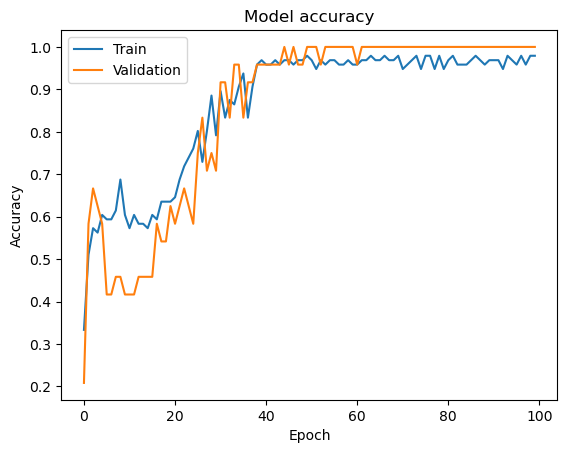

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


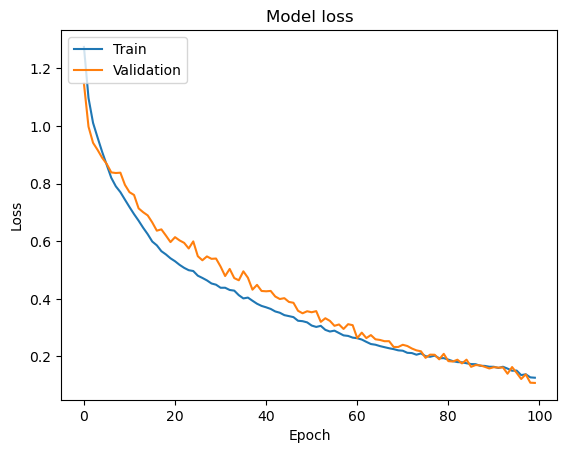

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
from sklearn.metrics import classification_report

In [43]:
# Deep Learning predictions
predictions = np.argmax(model.predict(X_test), axis=-1)

1/1 [==============================] - 0s 210ms/step


In [44]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()